In [158]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Q1 (Bonus Question)

Read the following datasets from Ames, Iowa for the years 2007-2010:

1. House_features1.csv: Features of houses in some of the neibhborhoods of Ames
2. House_features2.csv: Features of houses in some of the other neibhborhoods of Ames
3. House_prices.csv: Sale prices of all houses in (1) and (2), with a few missing values

The information for each house in different datasets can be mapped using House_Id. 

In [159]:
h_feats1 = pd.read_csv('House_features1.csv')

In [160]:
h_feats1

,House_Id,variable,value
0,220,Neighborhood,Blmngtn
1,230,Neighborhood,Blmngtn
2,386,Neighborhood,Blmngtn
3,444,Neighborhood,Blmngtn
4,466,Neighborhood,Blmngtn
...,...,...,...
3015,1328,GrLivArea,816
3016,1408,GrLivArea,833
3017,1435,GrLivArea,1126
3018,1447,GrLivArea,1188


In [161]:
h_feats2 = pd.read_csv('House_features2.csv')

In [162]:
h_feats2

,House_Id,variable,value
0,15,Neighborhood,NAmes
1,17,Neighborhood,NAmes
2,20,Neighborhood,NAmes
3,27,Neighborhood,NAmes
4,29,Neighborhood,NAmes
...,...,...,...
4275,765,GrLivArea,1494
4276,850,GrLivArea,1855
4277,1156,GrLivArea,1437
4278,1165,GrLivArea,1432


In [163]:
h_prices = pd.read_csv('House_prices.csv')


(a) Combine the two datasets with house features to obtain a single dataset containing features for all the houses in Ames. What is the number of observations in the combined dataset? Hint: Stack the datasets one on top of the other (4 points).

In [164]:
h_feats = pd.concat([h_feats1, h_feats2])

In [165]:
h_feats.index


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279],
           dtype='int64', length=7300)

7300 observations

In [166]:
result = h_feats.stack()
result

0     House_Id             220
      variable    Neighborhood
      value            Blmngtn
1     House_Id             230
      variable    Neighborhood
                      ...     
4278  variable       GrLivArea
      value               1432
4279  House_Id            1254
      variable       GrLivArea
      value               2167
Length: 21900, dtype: object

(b) Reshape the dataset obtained in the previous question to the House_Id level, i.e., all the information for a house must be contained in a single observation. Excluding House_Id, how many columns do you have in the reshaped dataset? Hint: Use the Pandas function pivot() (4 points).

In [167]:
pivot_h_feats = h_feats.pivot(index='House_Id', columns='variable', values='value')

In [168]:
pivot_h_feats

variable,BldgType,GrLivArea,HouseStyle,Neighborhood,OverallQual
House_Id,,,,,
1,1Fam,1710,2Story,CollgCr,7
2,1Fam,1262,1Story,Veenker,6
3,1Fam,1786,2Story,CollgCr,7
4,1Fam,1717,2Story,Crawfor,7
5,1Fam,2198,2Story,NoRidge,8
...,...,...,...,...,...
1456,1Fam,1647,2Story,Gilbert,6
1457,1Fam,2073,1Story,NWAmes,6
1458,1Fam,2340,2Story,Crawfor,7


There are 5 columns

(c) Combine the dataset obtained in the previous question with House_prices.csv, so that you obtain the price and features of each house as a single observation. What is the number of observations in the combined dataset (4 points)?

Hint: Instead of directly using the dataset obtained in the previous question, perform the following operations to make it easier to use:

(i) If you used pivot() in the previous question, reset the index on the dataframe in-place so that House_Id becomes a column.

(ii) Merge the resulting dataframe with the price dataframe.


In [169]:
pivot_h_feats.reset_index()

variable,House_Id,BldgType,GrLivArea,HouseStyle,Neighborhood,OverallQual
0,1,1Fam,1710,2Story,CollgCr,7
1,2,1Fam,1262,1Story,Veenker,6
2,3,1Fam,1786,2Story,CollgCr,7
3,4,1Fam,1717,2Story,Crawfor,7
4,5,1Fam,2198,2Story,NoRidge,8
...,...,...,...,...,...,...
1455,1456,1Fam,1647,2Story,Gilbert,6
1456,1457,1Fam,2073,1Story,NWAmes,6
1457,1458,1Fam,2340,2Story,Crawfor,7
1458,1459,1Fam,1078,1Story,NAmes,5


In [170]:
h_prices

,House_Id,SalePrice
0,220,167240.0
1,230,192500.0
2,386,192000.0
3,444,NaN
4,466,178740.0
...,...,...
1455,765,270000.0
1456,850,187000.0
1457,1156,218000.0
1458,1165,194000.0


In [171]:
full_house = pd.merge(pivot_h_feats, h_prices, on='House_Id', how='left')

In [214]:
full_house

,House_Id,BldgType,GrLivArea,HouseStyle,Neighborhood,OverallQual,SalePrice
0,1,1Fam,1710,2Story,CollgCr,7,208500.0
1,2,1Fam,1262,1Story,Veenker,6,181500.0
2,3,1Fam,1786,2Story,CollgCr,7,223500.0
3,4,1Fam,1717,2Story,Crawfor,7,NaN
4,5,1Fam,2198,2Story,NoRidge,8,250000.0
...,...,...,...,...,...,...,...
1455,1456,1Fam,1647,2Story,Gilbert,6,175000.0
1456,1457,1Fam,2073,1Story,NWAmes,6,210000.0
1457,1458,1Fam,2340,2Story,Crawfor,7,266500.0
1458,1459,1Fam,1078,1Story,NAmes,5,142125.0


(d) Which neighborhood has the highest variance of sale price (3 points)?

In [173]:
full_house.groupby('Neighborhood').var().sort_values('SalePrice', ascending=False)

,House_Id,SalePrice
Neighborhood,,
NoRidge,169092.751220,1.348401e+10
StoneBr,119499.676667,1.312931e+10
NridgHt,161056.969925,9.850247e+09
Crawfor,186679.513725,4.805520e+09
Timber,170608.026316,4.506202e+09
Somerst,175468.074966,2.975473e+09
Veenker,210976.890909,2.928924e+09
SawyerW,166334.510812,2.916138e+09
OldTown,189888.426043,2.747467e+09


NoRidges highest variance

(e) Which neighborhood has the highest correlation between GrLivArea (ground living area) and SalePrice? Ignore the neighborhood with 10 or less observations (7 points). Hint: 
    (i) Use groupby(<column>).filter() to remove neighborhood with 10 or less observations. 
    (ii) Use groupby(<column>).apply(lambda f:n) to find correlation, followed by using sort_values.

In [246]:
filtered_full_house = full_house.groupby(['Neighborhood']).filter(lambda x: x['House_Id'].count() > 10.)

In [194]:
filtered_full_house.reset_index()

,index,House_Id,BldgType,GrLivArea,HouseStyle,Neighborhood,OverallQual,SalePrice
0,0,1,1Fam,1710,2Story,CollgCr,7,208500.0
1,1,2,1Fam,1262,1Story,Veenker,6,181500.0
2,2,3,1Fam,1786,2Story,CollgCr,7,223500.0
3,3,4,1Fam,1717,2Story,Crawfor,7,NaN
4,4,5,1Fam,2198,2Story,NoRidge,8,250000.0
...,...,...,...,...,...,...,...,...
1444,1455,1456,1Fam,1647,2Story,Gilbert,6,175000.0
1445,1456,1457,1Fam,2073,1Story,NWAmes,6,210000.0
1446,1457,1458,1Fam,2340,2Story,Crawfor,7,266500.0
1447,1458,1459,1Fam,1078,1Story,NAmes,5,142125.0


In [248]:
filtered_full_house['GrLivArea'] = pd.to_numeric(filtered_full_house['GrLivArea'])

In [249]:
filtered_full_house['GrLivArea'].dtype

dtype('int64')

In [254]:
correlation = filtered_full_house.groupby('Neighborhood').apply(lambda f: f.corr()).sort_values('Neighborhood')

In [260]:
correlation = correlation.drop(['House_Id', 'SalePrice'], axis=1).sort_values('GrLivArea', ascending=False)

KeyError: "['House_Id', 'SalePrice'] not found in axis"

In [262]:
correlation.loc[correlation['GrLivArea'] != 1.000000].head(1)

,,GrLivArea
Neighborhood,,
NoRidge,SalePrice,0.885033


(f) The variable OverallQual rates the material and finish of the house. The ratings are given by integers from 1 to 10: 1 being poor and 10 being excellent. Create a dataframe that shows the median sale prices of houses receiving a OverallQual score 2, score 5 and score 7 (3 points).

In [221]:
qual_filtered = full_house.loc[full_house['OverallQual'].isin(['2', '5', '7'])]

In [224]:
qual_filtered.groupby('OverallQual')['SalePrice'].median()

OverallQual
2     60000.0
5    133000.0
7    201800.0
Name: SalePrice, dtype: float64

Q2 (Bonus Question)

Read the following datasets on used cars:

    Car_features_train.csv: Features of cars such as brand, model, year, etc.
    Car_prices_train.csv: Sale price of cars in 1.
    Car_features_test.csv: Features of cars such as brand, model, year, etc.
    Car_prices_test.csv: Sale price of cars in 3.

The information for each car in the above datasets can be matched using CarID.

In [225]:
car_feats_train = pd.read_csv('Car_features_train.csv')
car_prices_train = pd.read_csv('Car_prices_train.csv')
car_feats_test = pd.read_csv('Car_features_test.csv')
car_prices_test = pd.read_csv('Car_prices_test.csv')

In [226]:
car_feats_test

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0
1,14919,bmw,6 Series,2014,Semi-Auto,62695,Diesel,165,51.2769,3.0
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0
4,12641,bmw,6 Series,2015,Automatic,25757,Diesel,160,49.6192,3.0
...,...,...,...,...,...,...,...,...,...,...
2667,17161,vauxhall,Zafira Tourer,2017,Manual,22688,Petrol,150,41.5865,1.4
2668,17742,vauxhall,Zafira Tourer,2017,Manual,17527,Petrol,200,41.6969,1.4
2669,18775,vauxhall,Zafira Tourer,2017,Manual,29221,Petrol,145,41.3406,1.4
2670,13181,vauxhall,Zafira Tourer,2017,Automatic,27477,Petrol,200,40.7051,1.4


In [227]:
car_prices_train

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [237]:
car_feats_test

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0
1,14919,bmw,6 Series,2014,Semi-Auto,62695,Diesel,165,51.2769,3.0
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0
4,12641,bmw,6 Series,2015,Automatic,25757,Diesel,160,49.6192,3.0
...,...,...,...,...,...,...,...,...,...,...
2667,17161,vauxhall,Zafira Tourer,2017,Manual,22688,Petrol,150,41.5865,1.4
2668,17742,vauxhall,Zafira Tourer,2017,Manual,17527,Petrol,200,41.6969,1.4
2669,18775,vauxhall,Zafira Tourer,2017,Manual,29221,Petrol,145,41.3406,1.4
2670,13181,vauxhall,Zafira Tourer,2017,Automatic,27477,Petrol,200,40.7051,1.4


In [238]:
car_prices_test

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000
...,...,...
2667,19618,28990
2668,19620,17450
2669,19626,21995
2670,19630,18700


(a) Combine the datasets Car_features_train.csv and Car_prices_train.csv to obtain a single dataset containing the features and prices for each car. The combined dataset must be at the CarID level, i.e., all the information of a car must be in a single row. What is the number of cells in the combined dataset? (4 points) Hint: Number of cells = number of rows x Number of columns. 

In [228]:
car_train = pd.merge(car_feats_train, car_prices_train, on='carID')

In [229]:
car_train

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990
...,...,...,...,...,...,...,...,...,...,...,...
4955,17735,vauxhall,Zafira Tourer,2017,Automatic,34416,Petrol,200,41.0223,1.4,10790
4956,14016,vauxhall,Zafira Tourer,2017,Automatic,21227,Petrol,200,40.8438,1.4,11900
4957,18035,vauxhall,Zafira Tourer,2013,Manual,121349,Petrol,235,39.1574,1.8,3750
4958,17248,vauxhall,Zafira Tourer,2016,Automatic,21491,Petrol,235,39.3921,1.4,11925


In [233]:
shape =car_train.shape

In [234]:
number_of_cells = shape[1] * shape[0]
number_of_cells

54560

(b) Append Car_features_test.csv dataset (with their prices) to the dataset obtained in (a), i.e., stack the datasets one on top of the other. (6 points)

In [239]:
car_test = pd.merge(car_feats_test, car_prices_test, on='carID')

In [240]:
car_test

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0,18737
1,14919,bmw,6 Series,2014,Semi-Auto,62695,Diesel,165,51.2769,3.0,15750
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0,27500
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0,21975
4,12641,bmw,6 Series,2015,Automatic,25757,Diesel,160,49.6192,3.0,21298
...,...,...,...,...,...,...,...,...,...,...,...
2667,17161,vauxhall,Zafira Tourer,2017,Manual,22688,Petrol,150,41.5865,1.4,11250
2668,17742,vauxhall,Zafira Tourer,2017,Manual,17527,Petrol,200,41.6969,1.4,11000
2669,18775,vauxhall,Zafira Tourer,2017,Manual,29221,Petrol,145,41.3406,1.4,11499
2670,13181,vauxhall,Zafira Tourer,2017,Automatic,27477,Petrol,200,40.7051,1.4,11275


In [264]:
full_car = pd.concat([car_test, car_train])

In [269]:
full_car

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0,18737
1,14919,bmw,6 Series,2014,Semi-Auto,62695,Diesel,165,51.2769,3.0,15750
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0,27500
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0,21975
4,12641,bmw,6 Series,2015,Automatic,25757,Diesel,160,49.6192,3.0,21298
...,...,...,...,...,...,...,...,...,...,...,...
4955,17735,vauxhall,Zafira Tourer,2017,Automatic,34416,Petrol,200,41.0223,1.4,10790
4956,14016,vauxhall,Zafira Tourer,2017,Automatic,21227,Petrol,200,40.8438,1.4,11900
4957,18035,vauxhall,Zafira Tourer,2013,Manual,121349,Petrol,235,39.1574,1.8,3750
4958,17248,vauxhall,Zafira Tourer,2016,Automatic,21491,Petrol,235,39.3921,1.4,11925


(c) Which brands have (i) the cheapest and (ii) the most expensive cars on average? (4 points)

In [283]:
price_avg = full_car.groupby(['brand'])[['price']].mean()
price_avg.sort_values('price')

,price
brand,
vauxhall,11978.981818
skoda,13908.515674
hyundi,14763.489596
ford,15933.644649
toyota,18778.782427
vw,21862.010354
merc,30236.407711
bmw,38015.820041
audi,43055.277247


In [ ]:
price_avg.nsmallest(1, 'price')

In [278]:
price_avg.nlargest(1, 'price')

,price
brand,
audi,43055.277247


(d) Which model has the highest price range (most expensive - least expensive) in its cars? (4 points)

In [287]:
model_prices = full_car.groupby('model')[['price']].agg(['max','min'])

In [288]:
model_range = model_prices['price']['max'] - model_prices['price']['min']

In [290]:
model_range.nlargest(1)

model
 S Class    123304
dtype: int64

(e) Which engine size is the most common across all cars? (2 points)

In [295]:
full_car['engineSize'].value_counts().nlargest(1)

2.0    2011
Name: engineSize, dtype: int64

(f) Create a box plot for cars released after 2015 with mileage on the x-axis and brand on the y-axis (5 points)

In [297]:
full_car['year'].dtype

dtype('int64')

In [300]:
released_post_2015 = full_car.query('year > 2015')

In [301]:
released_post_2015

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12082,bmw,6 Series,2016,Automatic,37868,Diesel,160,50.9232,3.0,18737
2,15443,bmw,6 Series,2017,Semi-Auto,21083,Diesel,145,51.5744,3.0,27500
3,18074,bmw,6 Series,2016,Semi-Auto,28684,Diesel,160,51.2480,3.0,21975
5,13188,bmw,6 Series,2016,Semi-Auto,30252,Diesel,200,49.6542,3.0,22495
6,14383,bmw,6 Series,2016,Automatic,47148,Diesel,200,49.8426,3.0,20610
...,...,...,...,...,...,...,...,...,...,...,...
4954,14195,vauxhall,Zafira Tourer,2017,Automatic,15000,Petrol,200,41.1012,1.4,12200
4955,17735,vauxhall,Zafira Tourer,2017,Automatic,34416,Petrol,200,41.0223,1.4,10790
4956,14016,vauxhall,Zafira Tourer,2017,Automatic,21227,Petrol,200,40.8438,1.4,11900
4958,17248,vauxhall,Zafira Tourer,2016,Automatic,21491,Petrol,235,39.3921,1.4,11925


<AxesSubplot:xlabel='mileage', ylabel='brand'>

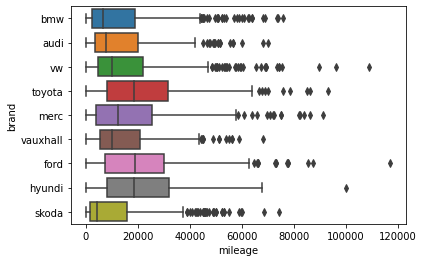

In [304]:
sns.boxplot(x='mileage', y='brand', data=released_post_2015)